# IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Data Collection and Preprocessing



In [0]:
# TODO: code and runtime results

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1n5Pw-7y-HdMAe_jXIAuoF9pwjl9bxpI3'
fluff, id = link.split('=')
id

'1n5Pw-7y-HdMAe_jXIAuoF9pwjl9bxpI3'

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_transaction.csv')  
train_trans = pd.read_csv('train_transaction.csv')

In [0]:
link = 'https://drive.google.com/open?id=1F6r7aNs7S9x7DF_-5d1mdhqUrCx0d9C5'
fluff, id = link.split('=')
id

'1F6r7aNs7S9x7DF_-5d1mdhqUrCx0d9C5'

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_identity.csv')  
train_id = pd.read_csv('train_identity.csv')

In [0]:
link = 'https://drive.google.com/open?id=1R0sucTkfwe9lVeD87TjINl5qExIOlful'
fluff, id = link.split('=')
id

'1R0sucTkfwe9lVeD87TjINl5qExIOlful'

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_transaction.csv')  
test_trans = pd.read_csv('test_transaction.csv')

In [0]:
link = 'https://drive.google.com/open?id=1sT3o8F1VM6dxv8VeJiM3Sb8Rz3rSt-4x'
fluff, id = link.split('=')
id

'1sT3o8F1VM6dxv8VeJiM3Sb8Rz3rSt-4x'

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_identity.csv')  
test_id = pd.read_csv('test_identity.csv')

In [0]:
joined_train = train_trans.set_index('TransactionID').join(train_id.set_index('TransactionID'))

In [0]:
joined_test = test_trans.set_index('TransactionID').join(test_id.set_index('TransactionID'))

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

**Device Type -** Fraudulent transactions are done using mobile phones a little more than using desktop, whereas the number of mobile users are only around 60% of the number of desktop users for non-fraudulent ones.

Text(0.5, 1.0, 'Device Type (isFraud == 1)')

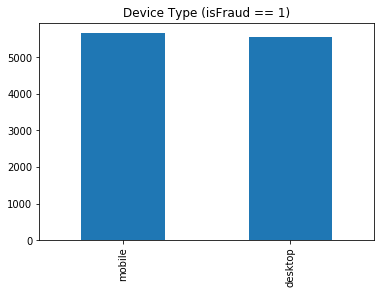

In [0]:
#1 Device Type
joined_train[joined_train.isFraud==1]['DeviceType'].value_counts().plot(kind='bar')
plt.title('Device Type (isFraud == 1)')

Text(0.5, 1.0, 'Device Type (isFraud == 0)')

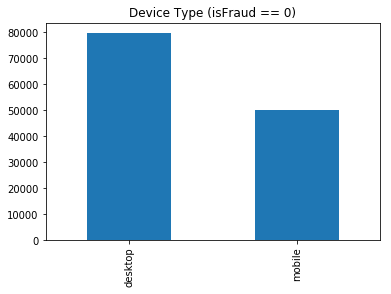

In [0]:
joined_train[joined_train.isFraud==0]['DeviceType'].value_counts().plot(kind='bar')
plt.title('Device Type (isFraud == 0)')

**Device Info -** The probability of a MacOS user being a fraudulent one is much less compared to the probability of a Windows or an iOS Device user being a fraudulent one.

Text(0.5, 1.0, 'Device Info (isFraud == 1)')

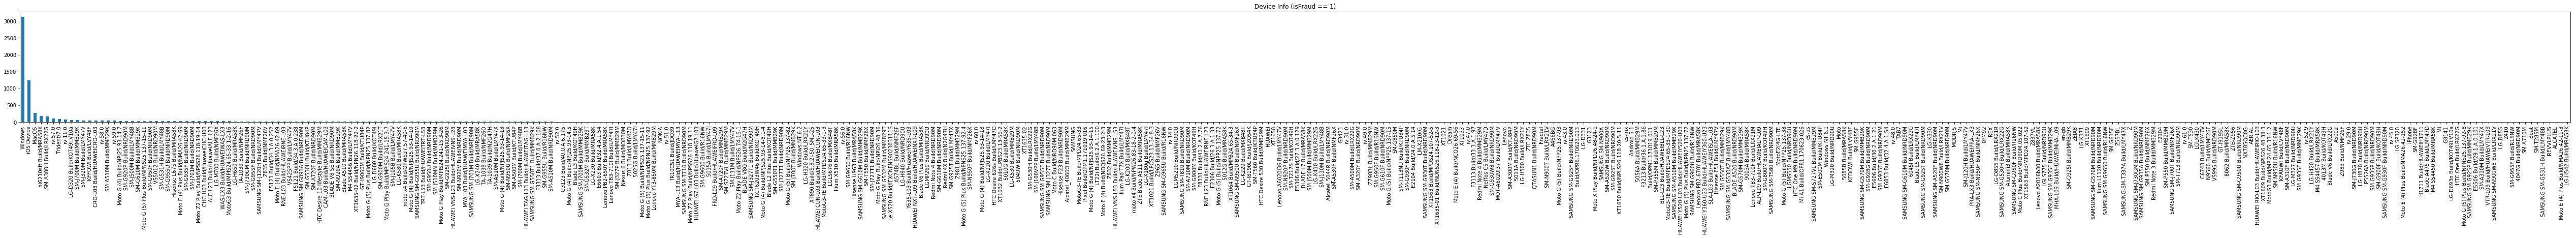

In [0]:
#2 Device Info
joined_train[joined_train.isFraud==1]['DeviceInfo'].value_counts().plot(kind='bar', figsize=(90, 4))
plt.title('Device Info (isFraud == 1)')

Text(0.5, 1.0, 'Device Info (isFraud == 0)')

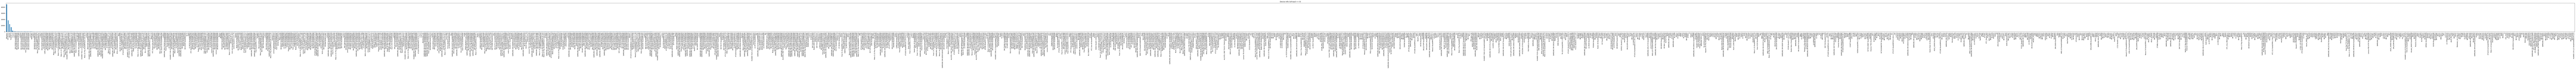

In [0]:
joined_train[joined_train.isFraud==0]['DeviceInfo'].value_counts().plot(kind='bar', figsize=(350, 4))
plt.title('Device Info (isFraud == 0)')

**TransactionDT -** The distribution of fraudulent and non-fraudulent transactions over the time of the day is almost the same as can be seen from the below graphs.

Text(0.5, 1.0, 'Transaction DT (isFraud == 1)')

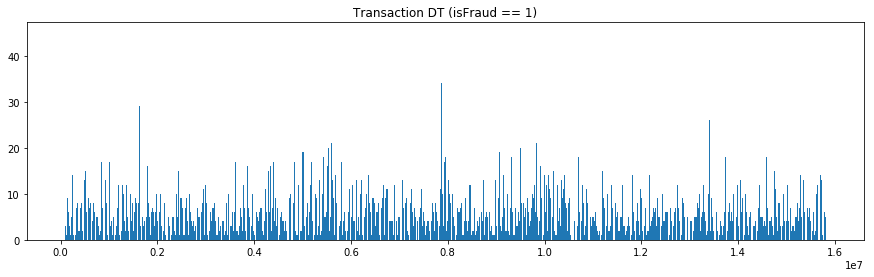

In [0]:
#3 Trans DT
plt.figure(figsize=[15,4])
plt.hist(joined_train[joined_train.isFraud==1]['TransactionDT'], bins=4000)
joined_train[joined_train.isFraud==1].shape
plt.title('Transaction DT (isFraud == 1)')

Text(0.5, 1.0, 'Transaction DT (isFraud == 0)')

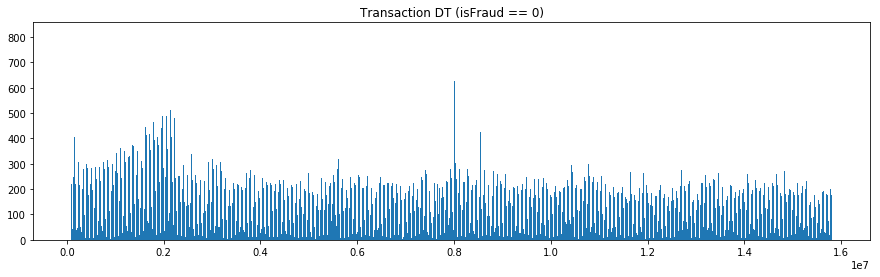

In [0]:
plt.figure(figsize=[15,4])
plt.hist(joined_train[joined_train.isFraud==0]['TransactionDT'], bins=4000)
joined_train[joined_train.isFraud==0].shape
plt.title('Transaction DT (isFraud == 0)')

**Transaction Amount -** The average transaction amount of the fraudulent transactions are lower than the non-fraudulent ones.

(20663, 433)


Text(0.5, 1.0, 'Transaction Amt (isFraud == 1)')

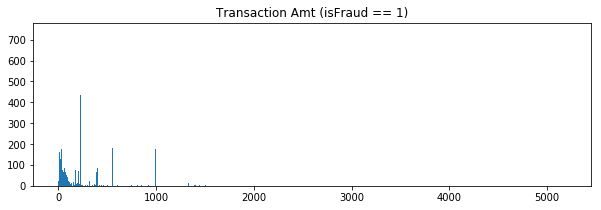

In [0]:
#4 Trans Amt
plt.figure(figsize=[10,3])
plt.hist(joined_train[joined_train.isFraud==1]['TransactionAmt'], bins=4000)
print(joined_train[joined_train.isFraud==1].shape)
plt.title('Transaction Amt (isFraud == 1)')

(569877, 433)


Text(0.5, 1.0, 'Transaction Amt (isFraud == 0)')

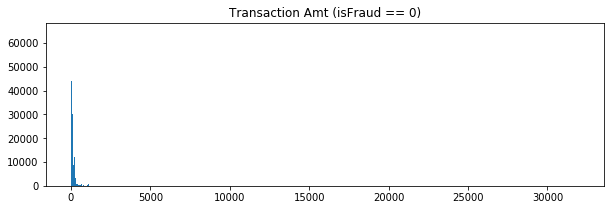

In [0]:
plt.figure(figsize=[10,3])
plt.hist(joined_train[joined_train.isFraud==0]['TransactionAmt'], bins=4000)
print(joined_train[joined_train.isFraud==0].shape)
plt.title('Transaction Amt (isFraud == 0)')

**ProductCD -** Fraudulent transactions occur exceptionally less in the W category compared to others.

Text(0.5, 1.0, 'ProductCD (isFraud == 1)')

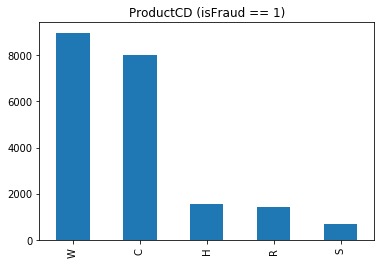

In [0]:
#5 ProductCD
joined_train[joined_train.isFraud==1]['ProductCD'].value_counts().plot(kind='bar')
plt.title('ProductCD (isFraud == 1)')

Text(0.5, 1.0, 'ProductCD (isFraud == 0)')

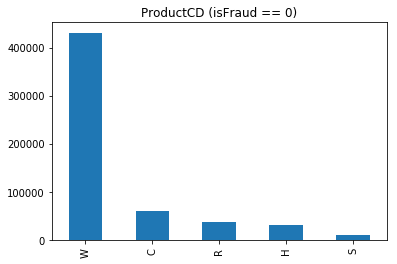

In [0]:
joined_train[joined_train.isFraud==0]['ProductCD'].value_counts().plot(kind='bar')
plt.title('ProductCD (isFraud == 0)')

**card4 -** The probability of fraudulent transactions is not much affected by card4.

Text(0.5, 1.0, 'card4 (isFraud == 1)')

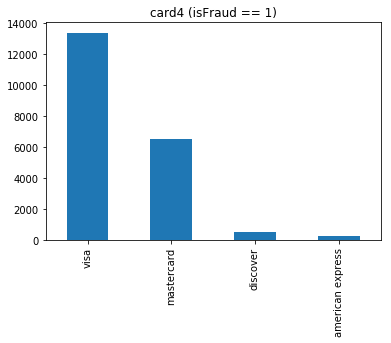

In [0]:
#6 card4(Issuer)
joined_train[joined_train.isFraud==1]['card4'].value_counts().plot(kind='bar')
plt.title('card4 (isFraud == 1)')

Text(0.5, 1.0, 'card4 (isFraud == 0)')

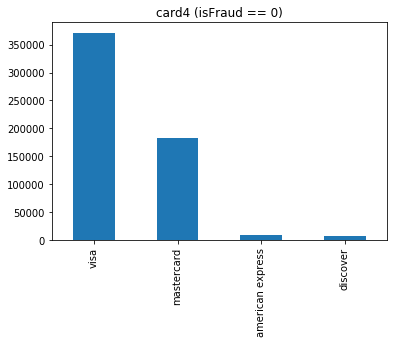

In [0]:
joined_train[joined_train.isFraud==0]['card4'].value_counts().plot(kind='bar')
plt.title('card4 (isFraud == 0)')

**card6 -** Credit card frauds are much higher than other card types.

Text(0.5, 1.0, 'card6 (isFraud == 1)')

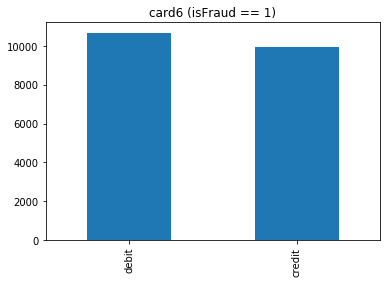

In [0]:
#7 card6(Debit/Credit)
joined_train[joined_train.isFraud==1]['card6'].value_counts().plot(kind='bar')
plt.title('card6 (isFraud == 1)')

Text(0.5, 1.0, 'card6 (isFraud == 0)')

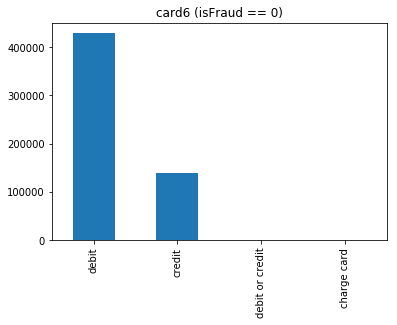

In [0]:
joined_train[joined_train.isFraud==0]['card6'].value_counts().plot(kind='bar')
plt.title('card6 (isFraud == 0)')

**P_emaildomain -** Frauds have been observed to be not preferring yahoo.com in contrast to the normal people.

Text(0.5, 1.0, 'P_emaildomain (isFraud == 1)')

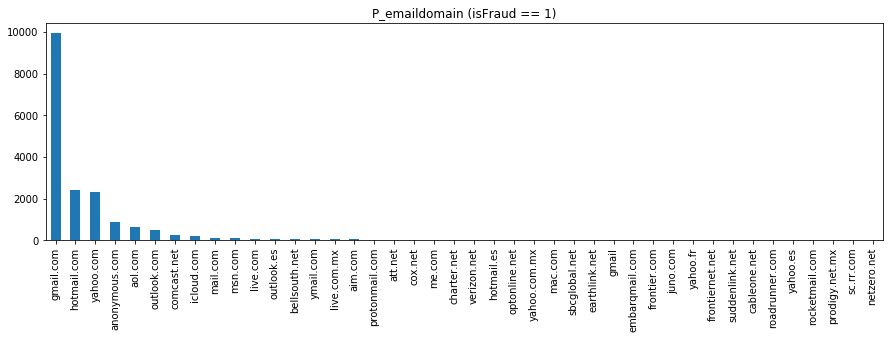

In [0]:
#8 P_emaildomain
joined_train[joined_train.isFraud==1]['P_emaildomain'].value_counts().plot(kind='bar', figsize=(15, 4))
plt.title('P_emaildomain (isFraud == 1)')

Text(0.5, 1.0, 'P_emaildomain (isFraud == 0)')

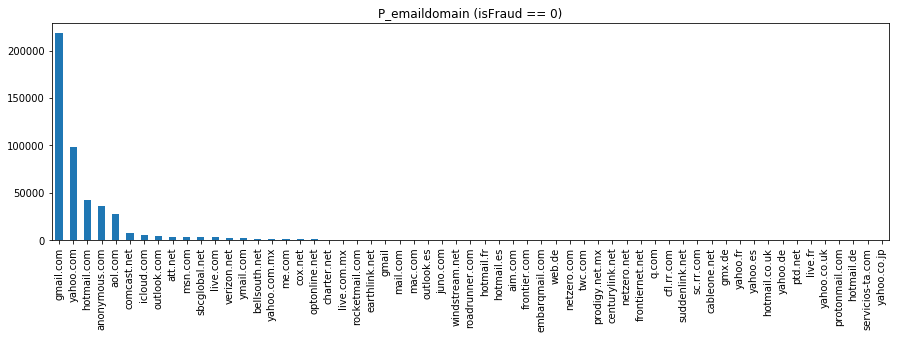

In [0]:
joined_train[joined_train.isFraud==0]['P_emaildomain'].value_counts().plot(kind='bar', figsize=(15, 4))
plt.title('P_emaildomain (isFraud == 0)')

**R_emaildomain -** anonymous.com has less ratio of fraudulent transactions than others.

Text(0.5, 1.0, 'R_emaildomain (isFraud == 1)')

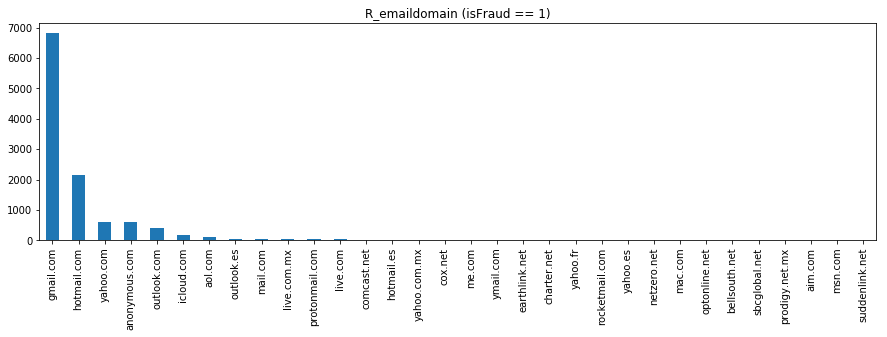

In [0]:
#9 R_emaildomain
joined_train[joined_train.isFraud==1]['R_emaildomain'].value_counts().plot(kind='bar', figsize=(15, 4))
plt.title('R_emaildomain (isFraud == 1)')

Text(0.5, 1.0, 'R_emaildomain (isFraud == 0)')

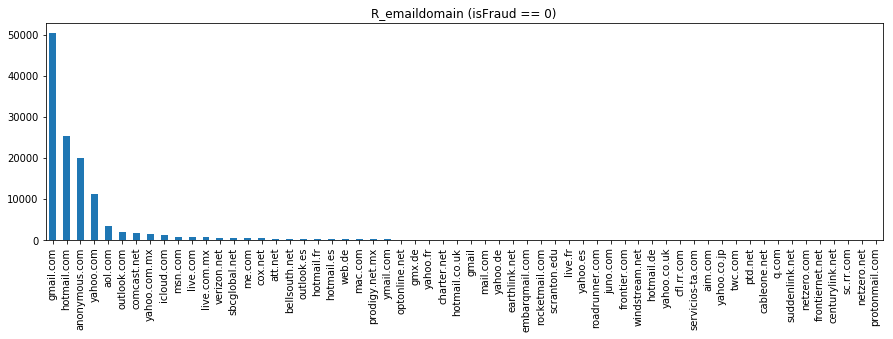

In [0]:
joined_train[joined_train.isFraud==0]['R_emaildomain'].value_counts().plot(kind='bar', figsize=(15, 4))
plt.title('R_emaildomain (isFraud == 0)')

Text(0.5, 1.0, 'addr1 (isFraud == 1)')

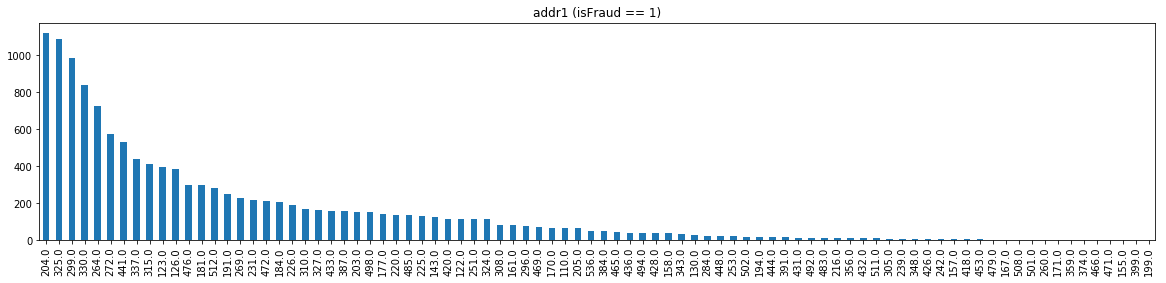

In [0]:
#10 addr1
joined_train[joined_train.isFraud==1]['addr1'].value_counts().plot(kind='bar', figsize=(20, 4))
plt.title('addr1 (isFraud == 1)')

Text(0.5, 1.0, 'addr1 (isFraud == 0)')

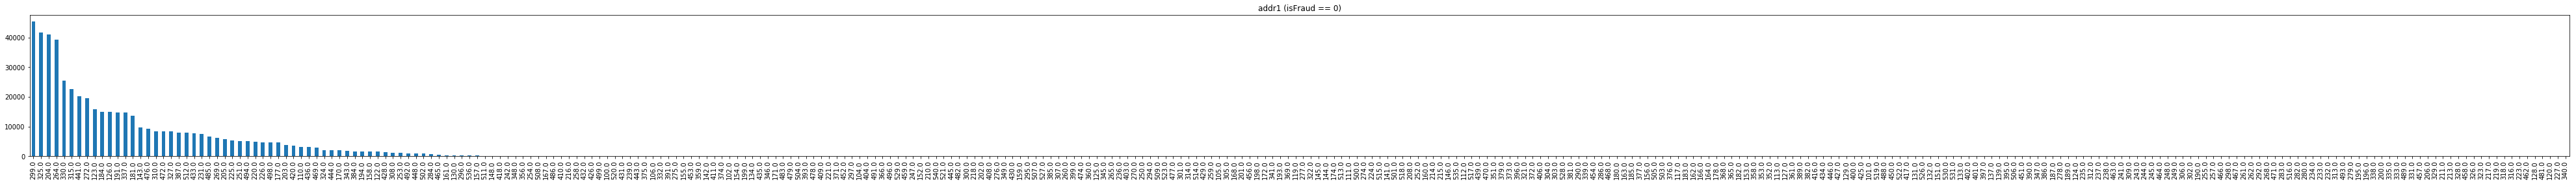

In [0]:
joined_train[joined_train.isFraud==0]['addr1'].value_counts().plot(kind='bar', figsize=(70, 4))
plt.title('addr1 (isFraud == 0)')

Text(0.5, 1.0, 'addr2 (isFraud == 1)')

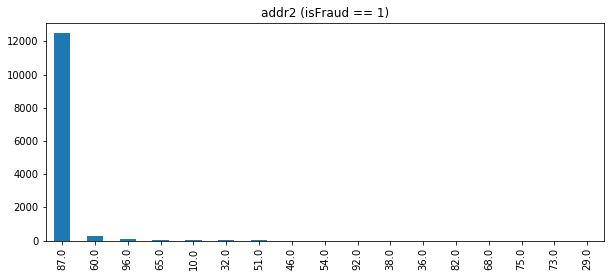

In [0]:
#11 addr2
joined_train[joined_train.isFraud==1]['addr2'].value_counts().plot(kind='bar', figsize=(10, 4))
plt.title('addr2 (isFraud == 1)')

Text(0.5, 1.0, 'addr2 (isFraud == 0)')

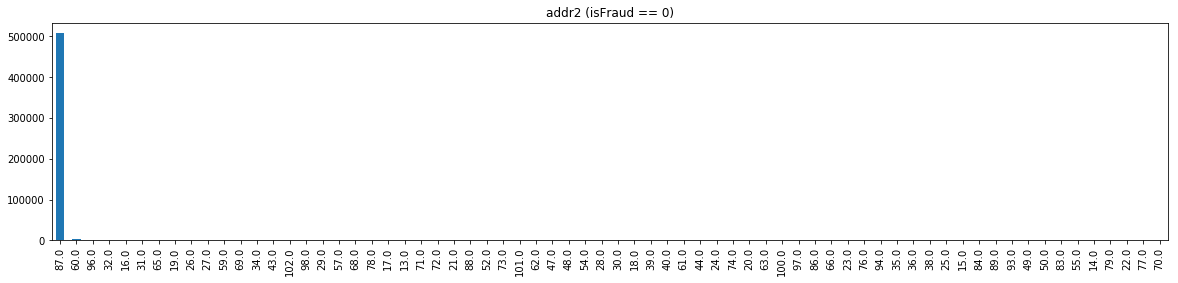

In [0]:
joined_train[joined_train.isFraud==0]['addr2'].value_counts().plot(kind='bar', figsize=(20, 4))
plt.title('addr2 (isFraud == 0)')

Text(0.5, 1.0, 'dist1 (isFraud == 1)')

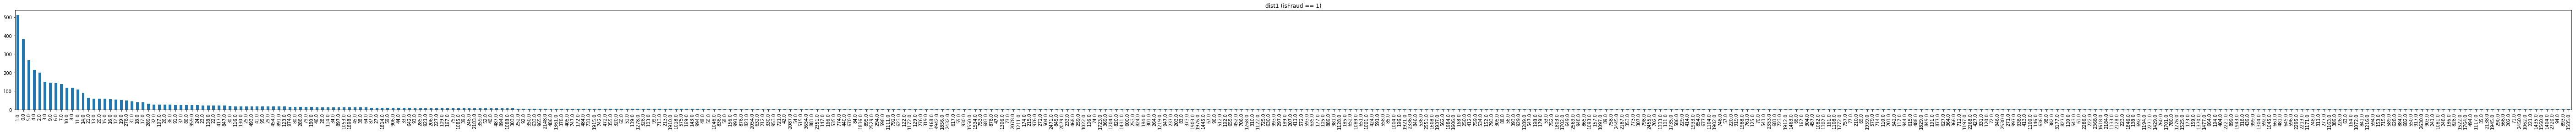

In [0]:
#12 dist1
joined_train[joined_train.isFraud==1]['dist1'].value_counts().plot(kind='bar', figsize=(100, 4))
plt.title('dist1 (isFraud == 1)')

Text(0.5, 1.0, 'dist1 (isFraud == 0)')

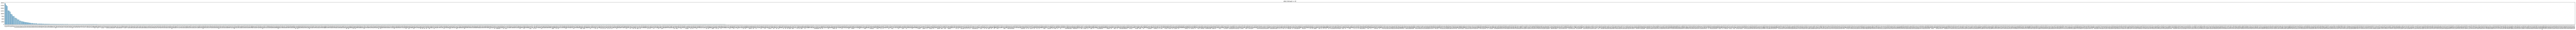

In [0]:
joined_train[joined_train.isFraud==0]['dist1'].value_counts().plot(kind='bar', figsize=(450, 4))
plt.title('dist1 (isFraud == 0)')

Text(0.5, 1.0, 'dist2 (isFraud == 1)')

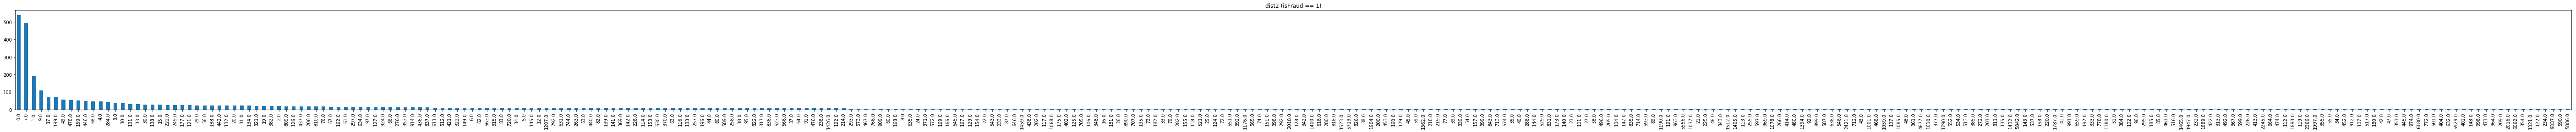

In [0]:
#13 dist2
joined_train[joined_train.isFraud==1]['dist2'].value_counts().plot(kind='bar', figsize=(100, 4))
plt.title('dist2 (isFraud == 1)')

Text(0.5, 1.0, 'dist2 (isFraud == 0)')

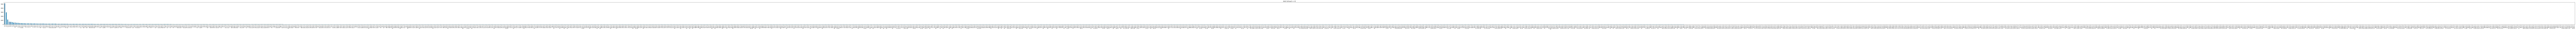

In [0]:
joined_train[joined_train.isFraud==0]['dist2'].value_counts().plot(kind='bar', figsize=(450, 4))
plt.title('dist2 (isFraud == 0)')

Write your answer here

## Part 2 - Transaction Frequency

(590540, 433)


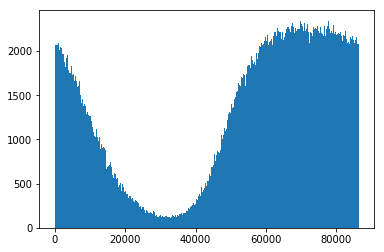

In [0]:
joined_train['TransactionDT'] %= 86400
plt.hist(joined_train[joined_train.addr2 == 87]['TransactionDT'], bins=400)
print(joined_train.shape)

(590540, 433)


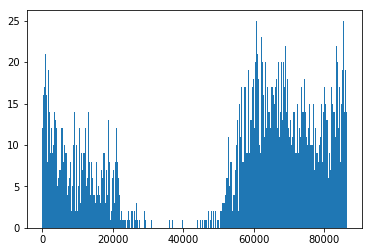

In [0]:
plt.hist(joined_train[joined_train.addr2 == 60]['TransactionDT'], bins=400)
print(joined_train.shape)

(590540, 433)


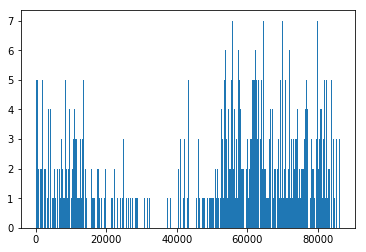

In [0]:
plt.hist(joined_train[joined_train.addr2 == 96]['TransactionDT'], bins=400)
print(joined_train.shape)

From the above graphs, the top 3 addr2 values appear to be from the nearby time zones. The sleeping hours of all these places can be assumed to be between 20000 mod 86400 and 45000 mod 86400 as there are very less transactions in this period.

## Part 3 - Product Code

In [0]:
joined_train = train_trans.set_index('TransactionID').join(train_id.set_index('TransactionID'))

In [0]:
# Find ProductCD with the highest max value
joined_train.groupby(['ProductCD'], sort=False)['TransactionAmt'].max()

ProductCD
W    31937.391
H      500.000
C      712.896
S     1550.000
R     1800.000
Name: TransactionAmt, dtype: float64

In [0]:
# Find ProductCD with the lowest min value
joined_train.groupby(['ProductCD'], sort=True)['TransactionAmt'].min()

ProductCD
C     0.251
H    15.000
R    25.000
S     5.000
W     1.000
Name: TransactionAmt, dtype: float64

In [0]:
joined_train["ProductCD_code"] = joined_train["ProductCD"].astype('category').cat.codes

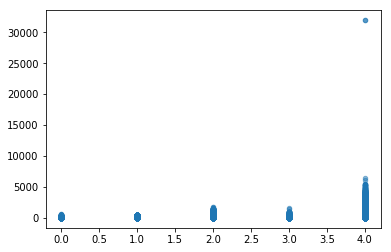

In [0]:
# C=0.0; H=1.0; R=2.0; S=3.0; W=4.0
plt.scatter(joined_train['ProductCD_code'], joined_train['TransactionAmt'], s=20, alpha=0.5);

(590540, 434)


42.872353113733446

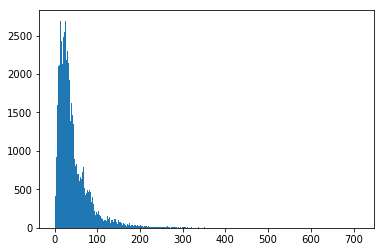

In [0]:
plt.hist(joined_train[joined_train.ProductCD == 'C']['TransactionAmt'], bins=400);
print(joined_train.shape)
joined_train[joined_train.ProductCD == 'C']['TransactionAmt'].mean()

(590540, 434)


73.17005813953489

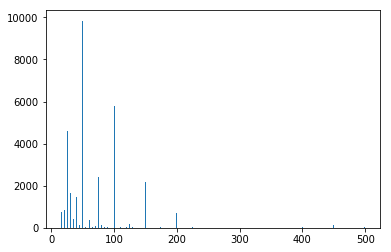

In [0]:
plt.hist(joined_train[joined_train.ProductCD == 'H']['TransactionAmt'], bins=400);
print(joined_train.shape)
joined_train[joined_train.ProductCD == 'H']['TransactionAmt'].mean()

(590540, 434)


168.30618849306347

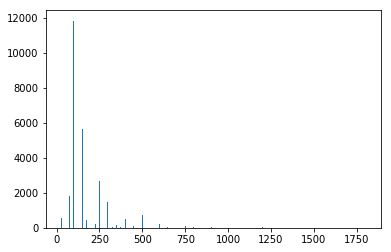

In [0]:
plt.hist(joined_train[joined_train.ProductCD == 'R']['TransactionAmt'], bins=400);
print(joined_train.shape)
joined_train[joined_train.ProductCD == 'R']['TransactionAmt'].mean()

(590540, 434)


60.269487444100434

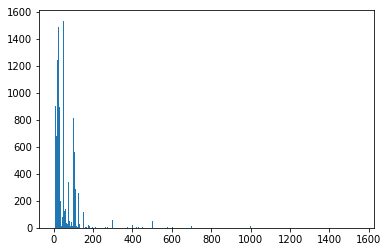

In [0]:
plt.hist(joined_train[joined_train.ProductCD == 'S']['TransactionAmt'], bins=400);
print(joined_train.shape)
joined_train[joined_train.ProductCD == 'S']['TransactionAmt'].mean()

(590540, 434)


153.15855385223293

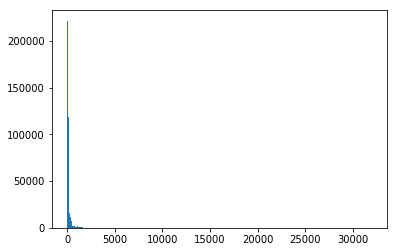

In [0]:
plt.hist(joined_train[joined_train.ProductCD == 'W']['TransactionAmt'], bins=400);
print(joined_train.shape)
joined_train[joined_train.ProductCD == 'W']['TransactionAmt'].mean()

ProductCD 'C' has the cheapest products and 'W' has the costliest products as inferred from the above diagrams.

## Part 4 - Correlation Coefficient

In [0]:
# Time of the day is adjusted to take the cycle from 00:00 to 23:59
import seaborn as sns
joined_train['TransactionDT'] %= 86400
joined_train['TransactionDT'] -= 32500
joined_train['TransactionDT'] %= 86400

(590540, 433)


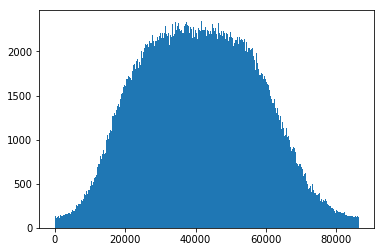

In [0]:
plt.hist(joined_train[joined_train.addr2 == 87]['TransactionDT'], bins=400)
print(joined_train.shape)

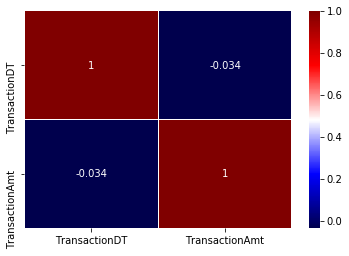

In [0]:
sns.heatmap(joined_train.loc[joined_train['addr2'] == 87][[x for x in joined_train.loc[joined_train['addr2'] == 87].columns if x in ['TransactionAmt', 'TransactionDT']]].corr(), cmap='seismic', linewidths=0.2, annot=True);

It has been observed that TransactionAmt and TransactionDT have a correlation of about 0.034. To get the best results, only the addr2 value of 87 has been considered for analysis.

## Part 5 - Interesting Plot

In [0]:
# TODO: code to generate the plot here.
joined_train = train_trans.set_index('TransactionID').join(train_id.set_index('TransactionID'))

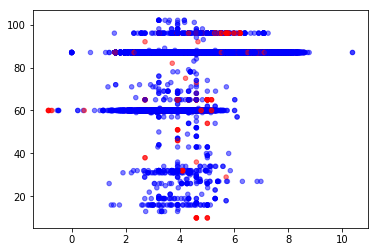

In [0]:
colors_dict = {0:'blue', 1:'red'}
plt.scatter(np.log(joined_train['TransactionAmt']), joined_train['addr2'], color=[colors_dict[x] for x in joined_train['isFraud']], s=20, alpha=0.5);

addr2 with the value 96 is found to have more number of fraudulent transaction than others. Though there are a lot of transactions at addr=87, the number of fraudulent transactions are relatively very low.

## Part 6 - Prediction Model

In [0]:
!pip install catboost
from catboost import Pool, CatBoostClassifier, cv

     |████████████████████████████████| 62.5MB 472kB/s 


In [0]:
categorical_columns = ['ProductCD','DeviceType','DeviceInfo','card4','card6','P_emaildomain','R_emaildomain',
                       'M1','M2','M3','M4','M5','M6','M7','M8','M9','id_12','id_15','id_16','id_23','id_27','id_28',
                       'id_29','id_30','id_31','id_33','id_34','id_35','id_36','id_37','id_38']

In [0]:
joined_train.loc[:,categorical_columns] = joined_train[categorical_columns].fillna('NA')
joined_test.loc[:,categorical_columns] = joined_test[categorical_columns].fillna('NA')

In [0]:
features = joined_test.columns.get_values()
features = features.tolist()

In [0]:
train_df = Pool(
    data=joined_train[features],
    label=joined_train['isFraud'],
    cat_features=categorical_columns,
)

In [0]:
test_df = Pool(
    data=joined_test[features],
    cat_features=categorical_columns,
)

In [0]:
parameters = {
    'iterations': 50,
    'custom_metric': 'AUC',
    'loss_function': 'CrossEntropy',
}

In [0]:
cv_res = cv(train_df, parameters, fold_count=3, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6444516	test: 0.6444668	best: 0.6444668 (0)	total: 13.7s	remaining: 11m 13s
1:	learn: 0.5994836	test: 0.5995009	best: 0.5995009 (1)	total: 24.2s	remaining: 9m 41s
2:	learn: 0.5566941	test: 0.5567197	best: 0.5567197 (2)	total: 33.7s	remaining: 8m 48s
3:	learn: 0.5194748	test: 0.5195077	best: 0.5195077 (3)	total: 45s	remaining: 8m 37s
4:	learn: 0.4852280	test: 0.4852734	best: 0.4852734 (4)	total: 56.9s	remaining: 8m 31s
5:	learn: 0.4546561	test: 0.4547052	best: 0.4547052 (5)	total: 1m 5s	remaining: 8m 3s
6:	learn: 0.4257419	test: 0.4257821	best: 0.4257821 (6)	total: 1m 16s	remaining: 7m 50s
7:	learn: 0.3995908	test: 0.3996331	best: 0.3996331 (7)	total: 1m 27s	remaining: 7m 38s
8:	learn: 0.3751901	test: 0.3752338	best: 0.3752338 (8)	total: 1m 37s	remaining: 7m 21s
9:	learn: 0.3540437	test: 0.3540904	best: 0.3540904 (9)	total: 1m 47s	remaining: 7m 10s
10:	learn: 0.3342553	test: 0.3342980	best: 0.3342980 (10)	total: 1m 58s	remaining: 6m 59s
11:	learn: 0.3161850	test: 0.3162367	b

In [0]:
cv_res

iterations  test-CrossEntropy-mean  ...  test-AUC-mean  test-AUC-std
0            0                0.644467  ...       0.634312      0.029352
1            1                0.599501  ...       0.701004      0.044463
2            2                0.556720  ...       0.755975      0.028334
3            3                0.519508  ...       0.761189      0.025754
4            4                0.485273  ...       0.766752      0.018739
5            5                0.454705  ...       0.766633      0.014077
6            6                0.425782  ...       0.767625      0.012639
7            7                0.399633  ...       0.769733      0.016687
8            8                0.375234  ...       0.777906      0.017857
9            9                0.354090  ...       0.785888      0.015615
10          10                0.334298  ...       0.788250      0.018268
11          11                0.316237  ...       0.793925      0.015273
12          12                0.300052  ...       0.797404      0.017161
13          13                0.284719  ...       0.799880      0.016734
14          14                0.271464  ...       0.799450      0.016513
15          15                0.258975  ...       0.803284      0.011909
16          16                0.247229  ...       0.807999      0.011272
17          17                0.236476  ...       0.812262      0.010200
18          18                0.226309  ...       0.817446      0.009178
19          19                0.217691  ...       0.817988      0.007737
20          20                0.209544  ...       0.819439      0.008059
21          21                0.202098  ...       0.821458      0.006167
22          22                0.195443  ...       0.825520      0.001551
23          23                0.189085  ...       0.826853      0.002482
24          24                0.183571  ...       0.827204      0.002693
25          25                0.178067  ...       0.828865      0.002307
26          26                0.173056  ...       0.829778      0.002954
27          27                0.168578  ...       0.830533      0.001902
28          28                0.164427  ...       0.832091      0.002253
29          29                0.160464  ...       0.834040      0.003382
30          30                0.157096  ...       0.836299      0.005257
31          31                0.153936  ...       0.837185      0.005796
32          32                0.151030  ...       0.837317      0.005246
33          33                0.148194  ...       0.837785      0.004857
34          34                0.145570  ...       0.838560      0.004272
35          35                0.143235  ...       0.838832      0.004238
36          36                0.141223  ...       0.840159      0.004174
37          37                0.139115  ...       0.840304      0.004366
38          38                0.136991  ...       0.840668      0.003893
39          39                0.135182  ...       0.841634      0.003444
40          40                0.133366  ...       0.843532      0.002994
41          41                0.131744  ...       0.844291      0.003496
42          42                0.130323  ...       0.844737      0.003343
43          43                0.128876  ...       0.845189      0.003393
44          44                0.127449  ...       0.846160      0.001825
45          45                0.126336  ...       0.846554      0.001994
46          46                0.125077  ...       0.846859      0.001832
47          47                0.123979  ...       0.847608      0.001861
48          48                0.122899  ...       0.847751      0.001849
49          49                0.121887  ...       0.849192      0.000756

[50 rows x 7 columns]

In [0]:
pred_mod = CatBoostClassifier(**parameters)

In [0]:
pred_mod.fit(train_df, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 0.2098065	total: 1.31s	remaining: 1m 4s
1:	learn: 0.1302108	total: 2.57s	remaining: 1m 1s
2:	learn: 0.1166919	total: 3.78s	remaining: 59.3s
3:	learn: 0.1101492	total: 5.07s	remaining: 58.3s
4:	learn: 0.1071559	total: 6.34s	remaining: 57.1s
5:	learn: 0.1049378	total: 7.83s	remaining: 57.4s
6:	learn: 0.1033227	total: 8.94s	remaining: 54.9s
7:	learn: 0.1015678	total: 10.3s	remaining: 53.9s
8:	learn: 0.1001257	total: 11.6s	remaining: 52.9s
9:	learn: 0.0994162	total: 12.7s	remaining: 50.7s
10:	learn: 0.0981592	total: 13.9s	remaining: 49.3s
11:	learn: 0.0970753	total: 15.2s	remaining: 48.3s
12:	learn: 0.0962828	total: 16.5s	remaining: 47s
13:	learn: 0.0955861	total: 17.7s	remaining: 45.5s
14:	learn: 0.0951807	total: 18.8s	remaining: 44s
15:	learn: 0.0945792	total: 20.2s	remaining: 42.9s
16:	learn: 0.0941533	total: 21.4s	remaining: 41.6s
17:	learn: 0.0937186	total: 22.6s	remaining: 40.2s
18:	learn: 0.0932818	total: 23.8s	remaining: 38.8s
19:	learn: 0.0926395

In [0]:
y_test = pred_mod.predict_proba(test_df)[:,1]

In [0]:
y_test

array([0.00424924, 0.00822199, 0.01124309, ..., 0.0080682 , 0.00925451,
       0.01187841])

In [0]:
print(pred_mod.get_best_score())

{'learn': {'CrossEntropy': 0.08404866709891294}}


In [0]:
pred_mod.score(train_df)

0.9779202086226166

In [0]:
joined_test['isFraud'] = y_test

In [0]:
final_op = joined_test[['isFraud']]

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
final_op.to_csv('submit_kaggle_ieee_.csv')
!cp submit_kaggle_ieee_.csv drive/My\ Drive/

CatBoost classifier has been used to model this case. CatBoost is based on gradient boosting which is more powerful. Since predicting fraud is a typical classification problem, this model has been chosen. All the character columns have been chosen as the categorical columns here.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/aiswaryalakshmi

Highest Rank: 4835

Score: 0.8971

Number of entries: 5

In [0]:
#@title Kaggle Rank
%%html
<iframe src = "https://drive.google.com/uc?id=1TJGCNWFuJA6yIxS1PYf_soh4NdKuwiHK" width= "1200" height = "1000"></iframe> 